# Time Series

Record a series of readings over time.

**Objective**

In this notebook, we show how to record time series with several examples:

- scaler
- temperature
- multiple detectors

See [Count the scaler](./_count_scaler.ipynb) for more details about configuring
and using a scaler.

## Start the `instrument` package

Our instrument package is in the `bluesky` subdirectory here so we add that to
the search path before importing it.

In [1]:
import pathlib, sys
sys.path.append(str(pathlib.Path.home() / "bluesky"))
from instrument.collection import *

/home/prjemian/bluesky/instrument/_iconfig.py
Activating auto-logging. Current session state plus future input saved.
Filename       : /home/prjemian/Documents/projects/BCDA-APS/bluesky_training/docs/source/howto/.logs/ipython_console.log
Mode           : rotate
Output logging : True
Raw input log  : False
Timestamping   : True
State          : active


I Wed-12:51:21 - ############################################################ startup
I Wed-12:51:21 - logging started
I Wed-12:51:21 - logging level = 10
I Wed-12:51:21 - /home/prjemian/bluesky/instrument/session_logs.py
I Wed-12:51:21 - /home/prjemian/bluesky/instrument/collection.py
I Wed-12:51:21 - CONDA_PREFIX = /home/prjemian/.conda/envs/bluesky_2024_3


Exception reporting mode: Minimal


I Wed-12:51:21 - xmode exception level: 'Minimal'
I Wed-12:51:21 - /home/prjemian/bluesky/instrument/mpl/notebook.py
I Wed-12:51:21 - #### Bluesky Framework ####
I Wed-12:51:21 - /home/prjemian/bluesky/instrument/framework/check_python.py
I Wed-12:51:21 - /home/prjemian/bluesky/instrument/framework/check_bluesky.py
I Wed-12:51:21 - /home/prjemian/bluesky/instrument/framework/initialize.py
I Wed-12:51:21 - RunEngine metadata saved in directory: /home/prjemian/.config/Bluesky_RunEngine_md
I Wed-12:51:21 - using databroker catalog 'training'
I Wed-12:51:21 - using ophyd control layer: pyepics
I Wed-12:51:21 - Using EPICS PV gp:gp:int20 for scan_id
I Wed-12:51:21 - /home/prjemian/bluesky/instrument/framework/metadata.py
I Wed-12:51:21 - #### Devices ####
I Wed-12:51:21 - /home/prjemian/bluesky/instrument/devices/area_detector.py
I Wed-12:51:21 - /home/prjemian/bluesky/instrument/devices/calculation_records.py
I Wed-12:51:26 - /home/prjemian/bluesky/instrument/devices/fourc_diffractometer.p

## Time Series: scaler1

First, set the scaler's *counting time* to 0.2 seconds when we count here.

<details>
<summary>NOTE</summary>

The scaler used here is an EPICS software simulator of real scaler hardware.  It
has a bug that almost always adds to the configured preset time. Expect the
counting times to be 0.3s in this document.

</details>

In [2]:
scaler1.preset_time.put(0.2)

Now, use the bluesky
[RunEngine](https://blueskyproject.io/bluesky/generated/bluesky.run_engine.RunEngine.html?highlight=runengine#bluesky.run_engine.RunEngine)
(`RE`) to count `scaler1`.  We'll use the bluesky plan
([bp](https://blueskyproject.io/bluesky/plans.html?highlight=count#pre-assembled-plans))
called
[count()](https://blueskyproject.io/bluesky/generated/bluesky.plans.count.html#bluesky.plans.count).

The first argument to `bp.count()` is a *list* of detectors.  At each reading,
each "detector" is triggered (to executes its data acquisition steps).  Once all
detectors have finished triggering, all detectors are read out and reported.

Any "detector" (readable device or signal) can be recorded as a time series.
For example `scaler1` (in this simulator) is such a readable device.  A readable
device or signal has a `.read()` method that returns time-stamped data.

Here, we read `scaler1`.

In [3]:
scaler1.read()

OrderedDict([('clock', {'value': 3000000.0, 'timestamp': 1730310528.098214}),
             ('I0', {'value': 1.0, 'timestamp': 1730310528.098214}),
             ('scint', {'value': 1.0, 'timestamp': 1730310528.098214}),
             ('diode', {'value': 1.0, 'timestamp': 1730310528.098214}),
             ('I000', {'value': 1.0, 'timestamp': 1730310528.098214}),
             ('I00', {'value': 2.0, 'timestamp': 1730310528.098214}),
             ('scaler1_time', {'value': 0.3, 'timestamp': 1730310528.098214})])

Using `scaler1`, record 10 measurements at 1.0 second intervals.

We choose an interval time that is longer than the count time for the `scaler`.



Transient Scan ID: 59     Time: 2024-10-30 12:51:30
Persistent Unique Scan ID: '9933bc4e-a764-4bc8-8eca-15e09fa66a8b'
New stream: 'label_start_motor'
New stream: 'primary'
+-----------+------------+------------+------------+------------+------------+------------+------------+
|   seq_num |       time |      clock |         I0 |      scint |      diode |       I000 |        I00 |
+-----------+------------+------------+------------+------------+------------+------------+------------+
|         1 | 12:51:30.6 |    3000000 |          1 |          2 |          1 |          2 |          1 |
|         2 | 12:51:32.6 |    3000000 |          0 |          1 |          1 |          1 |          1 |
|         3 | 12:51:34.4 |    3000000 |          1 |          1 |          2 |          1 |          1 |
|         4 | 12:51:36.2 |    3000000 |          0 |          1 |          0 |          0 |          1 |
|         5 | 12:51:38.0 |    3000000 |          2 |          2 |          1 |          1 |

('9933bc4e-a764-4bc8-8eca-15e09fa66a8b',)

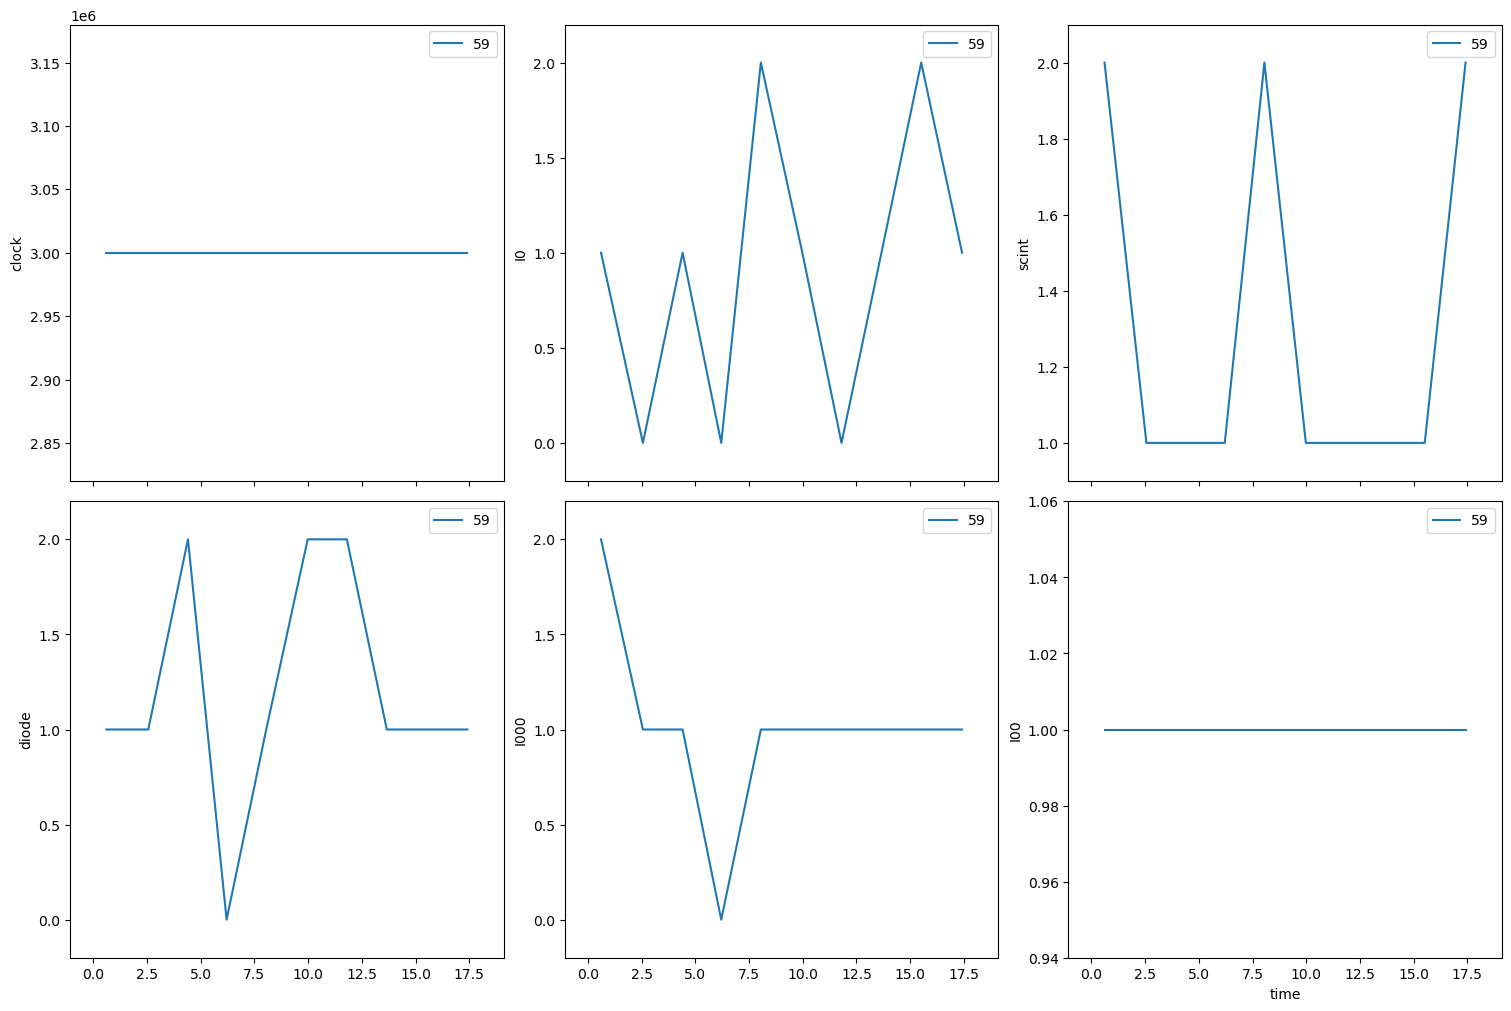

In [4]:
RE(bp.count([scaler1], num=10, delay=1.0))

## Time Series: Temperature

Here, we read the `temperature`.  See the [HOWTO](./_temperature_controller_swait.ipynb) for more details about the `temperature` device.

In [5]:
temperature.read()

OrderedDict([('temperature',
              {'value': 24.76918440527962, 'timestamp': 1730310709.524552}),
             ('temperature_setpoint',
              {'value': 25.0, 'timestamp': 1730310688.811508})])

Measure the time series.  Same command as before, substituting `temperature` for
`scaler1`.



Transient Scan ID: 60     Time: 2024-10-30 12:51:50
Persistent Unique Scan ID: 'e0c35c09-77f7-4281-9b54-3ed9d8003122'
New stream: 'label_start_motor'
New stream: 'primary'
+-----------+------------+-------------+
|   seq_num |       time | temperature |
+-----------+------------+-------------+
|         1 | 12:51:51.1 |    24.76918 |
|         2 | 12:51:52.1 |    25.07096 |
|         3 | 12:51:53.1 |    25.07096 |
|         4 | 12:51:54.1 |    25.25232 |
|         5 | 12:51:55.1 |    25.25232 |
|         6 | 12:51:56.1 |    25.48341 |
|         7 | 12:51:57.1 |    25.48341 |
|         8 | 12:51:58.1 |    25.04672 |
|         9 | 12:51:59.1 |    25.04672 |
|        10 | 12:52:00.1 |    24.77842 |
+-----------+------------+-------------+
generator count ['e0c35c09'] (scan num: 60)


('e0c35c09-77f7-4281-9b54-3ed9d8003122',)

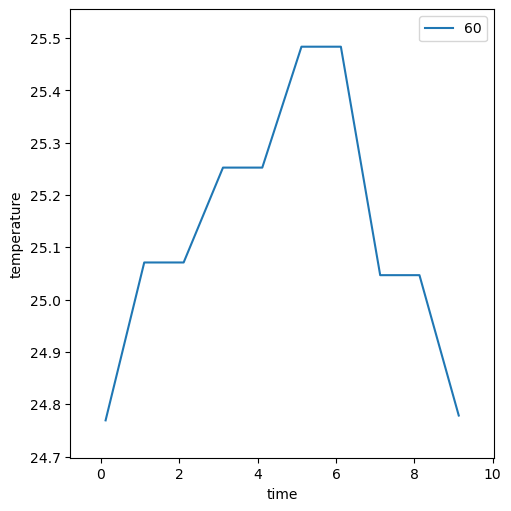

In [6]:
RE(bp.count([temperature], num=10, delay=1.0))

## Time Series: multiple detectors

Measure a time series with a list of several "detectors".

It is possible to use a component of a device as a detector.  Here, we pick the
simulated double-crystal monochromator energy (`dcm.energy`) as a detector. See
the [XAFS scan example](../example/_xafs_scan.ipynb) for more details about the
`dcm.energy` device.

See the [lineup 1D HOWTO](./_lineup_1d_peak.ipynb) for more details about the
`noisy` signal.



Transient Scan ID: 61     Time: 2024-10-30 12:52:01
Persistent Unique Scan ID: '70a10a74-dd7c-4de4-b949-206024987ce9'
New stream: 'label_start_motor'
New stream: 'primary'
+-----------+------------+-------------+------------+------------+------------+------------+------------+------------+------------+------------+
|   seq_num |       time | temperature | dcm_energy |      noisy |      clock |         I0 |      scint |      diode |       I000 |        I00 |
+-----------+------------+-------------+------------+------------+------------+------------+------------+------------+------------+------------+
|         1 | 12:52:01.9 |    24.93169 |    10.2000 |  411.76118 |    3000000 |          1 |          1 |          2 |          0 |          1 |
|         2 | 12:52:05.9 |    24.98342 |    10.2000 |  411.76118 |    3000000 |          0 |          0 |          0 |          1 |          2 |
|         3 | 12:52:09.7 |    25.44995 |    10.2000 |  411.76118 |    3000000 |          1 |         

('70a10a74-dd7c-4de4-b949-206024987ce9',)

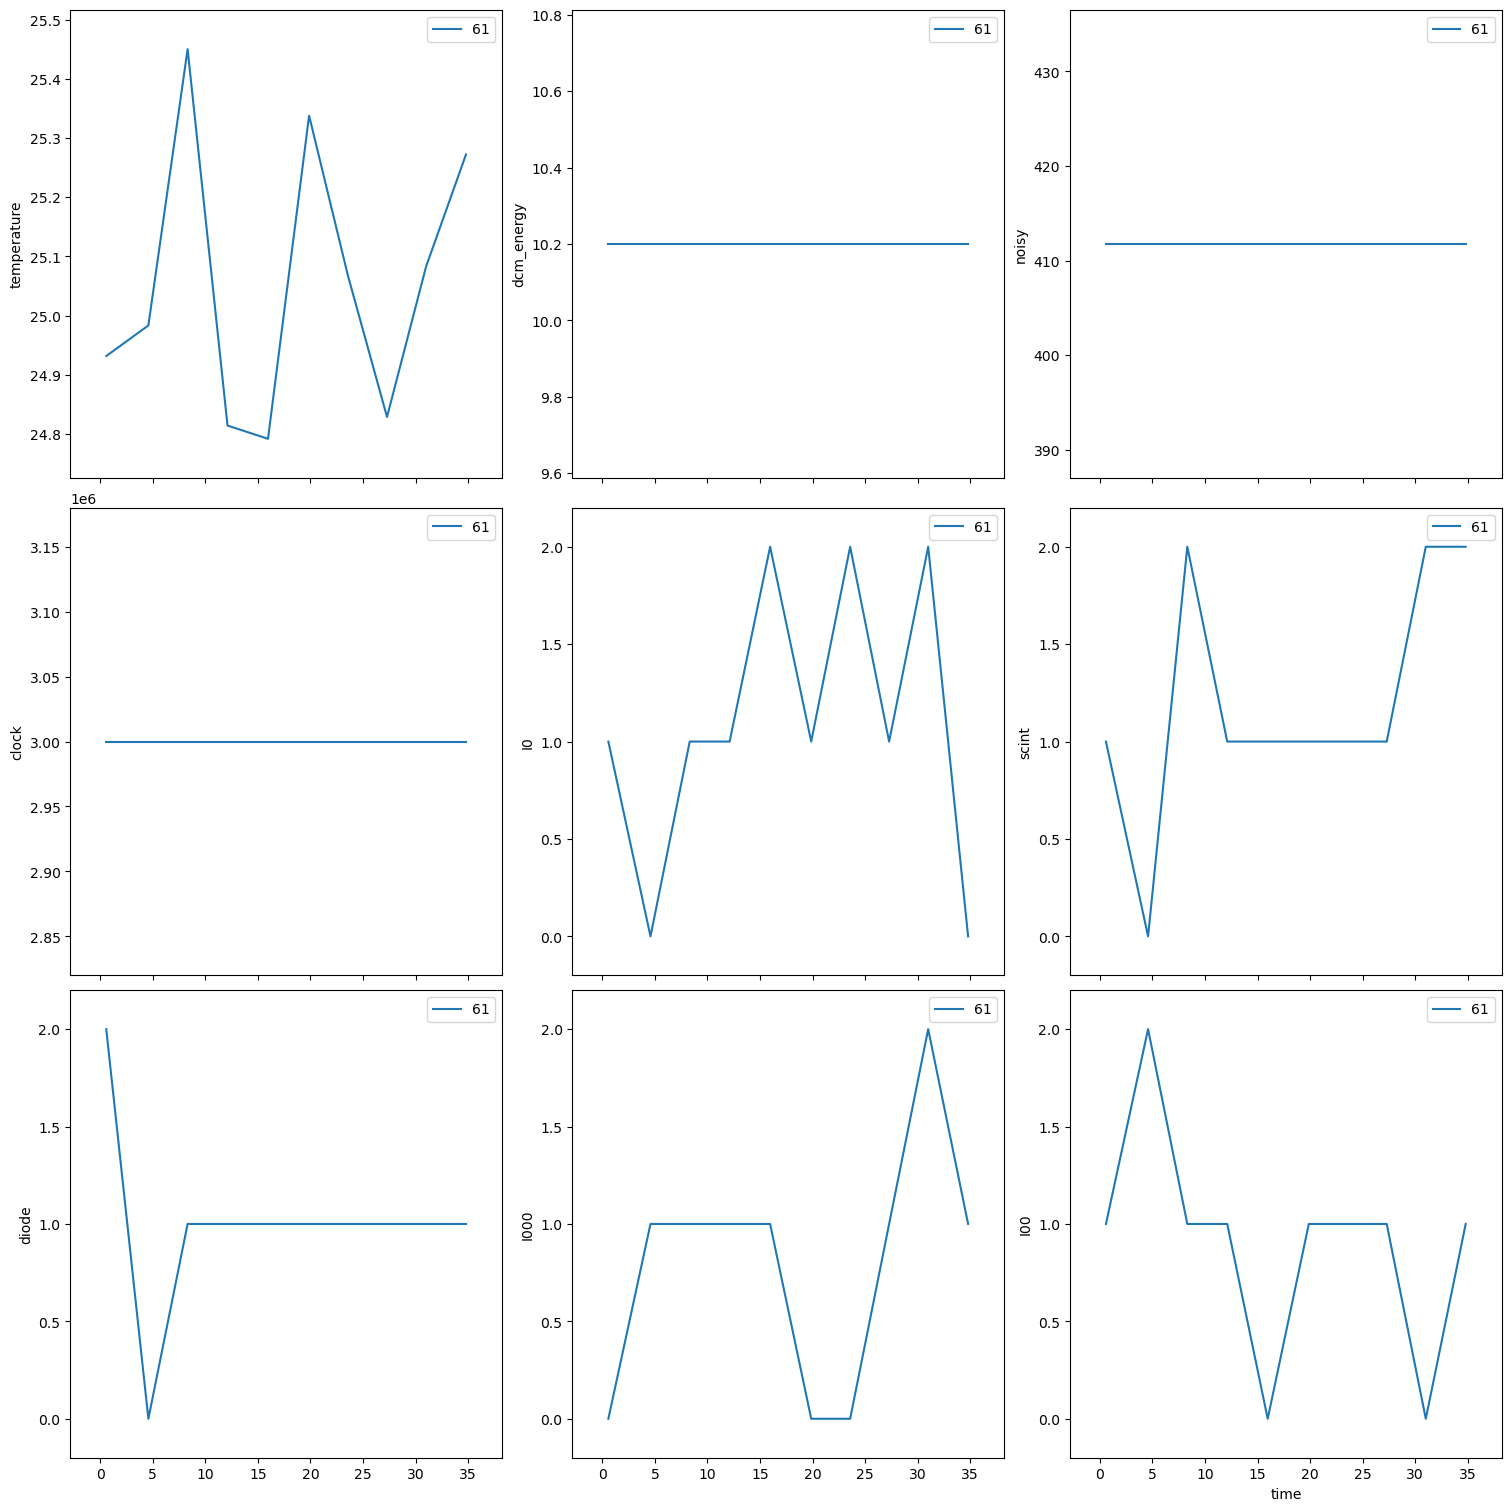

In [7]:
RE(bp.count([temperature, noisy, dcm.energy, scaler1], num=10, delay=1.0))